<img src="Avenida máxima probable. P.H. Norte II.jpg">

[Fit surface to polynomials in Python](https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6)

In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
a = 3.5465
b = 0.208
c = 0.7727
d = -0.0315

In [3]:
def Q_from_TS(T, S, a=3.5465, b=0.208, c=0.7727, d=-0.0315):
    """"""
    
    Q = a * T**b * S**(c + d * np.log10(T))
    
    return Q

In [4]:
# Prueba con un T y una superficie cualquiera
T = 10 # años
S = 1174 # km²

In [5]:
# Aplico la fórmula
Q = Q_from_TS(T, S)
print('Q = {0:.1f} m³/s'.format(Q))

Q = 1079.0 m³/s


In [6]:
def f(T, S=S, Q=Q, a=3.5465, b=0.208, c=0.7727, d=-0.0315):
    return round(a * T**b * S**(c + d * np.log10(T)) - Q, 1)

In [7]:
# Hago la derivada que me servirá para encontrar las raices del polinomio según el metodo de Newton-Raphson
def fprime(T, S=S, Q=Q, a=3.5465, b=0.208, c=0.7727, d=-0.0315):
    return a * b * T**(b-1) * S**(c - d * np.log10(T)) + a * T**b * (d / (np.log(10) * T)) * S**(c +d * np.log10(T) - 1)

In [8]:
# calcular retorno por el método de Brent
Tbrent = optimize.root_scalar(f, bracket=[0.001, 2000], method='brentq').root

In [9]:
# calcular retorno por el método de Newton
Tnewton = optimize.root_scalar(f, x0=10, fprime=fprime, method='newton').root

In [10]:
# Compruebo que el periodo de retorno es el mismo que el que definí al principio. La  solución del polinomio es correcta
print('Brent:\tT = {0:.1f} años'.format(Tbrent))
print('Newton:\tT = {0:.1f} años'.format(Tnewton))

Brent:	T = 10.0 años
Newton:	T = 10.0 años


In [11]:
T = 10

In [12]:
# He creado 50 numeros en espacio logaritmico
# stop in np.logspace(start, stop, num=50) is the final value of the sequence. Number of samples to generate. Default is 50.
Ss = np.logspace(0, 4, num=50)
# Sz=np.random.multivariate_normal(mean, cov, 50)

# Periodos de retorno
Ts = [5, 10, 25, 50, 1000]

Qs = pd.DataFrame(index=Ss, columns=Ts)
for T in Qs.columns:
    Qs[T] = np.array([Q_from_TS(T, S) / S for S in Ss])

In [13]:
Ss

array([1.00000000e+00, 1.20679264e+00, 1.45634848e+00, 1.75751062e+00,
       2.12095089e+00, 2.55954792e+00, 3.08884360e+00, 3.72759372e+00,
       4.49843267e+00, 5.42867544e+00, 6.55128557e+00, 7.90604321e+00,
       9.54095476e+00, 1.15139540e+01, 1.38949549e+01, 1.67683294e+01,
       2.02358965e+01, 2.44205309e+01, 2.94705170e+01, 3.55648031e+01,
       4.29193426e+01, 5.17947468e+01, 6.25055193e+01, 7.54312006e+01,
       9.10298178e+01, 1.09854114e+02, 1.32571137e+02, 1.59985872e+02,
       1.93069773e+02, 2.32995181e+02, 2.81176870e+02, 3.39322177e+02,
       4.09491506e+02, 4.94171336e+02, 5.96362332e+02, 7.19685673e+02,
       8.68511374e+02, 1.04811313e+03, 1.26485522e+03, 1.52641797e+03,
       1.84206997e+03, 2.22299648e+03, 2.68269580e+03, 3.23745754e+03,
       3.90693994e+03, 4.71486636e+03, 5.68986603e+03, 6.86648845e+03,
       8.28642773e+03, 1.00000000e+04])

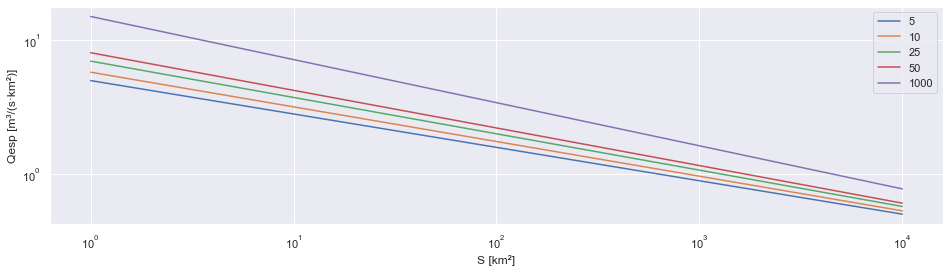

In [14]:
plt.figure(figsize=(16, 4))

for T in Qs.columns:
    plt.plot(Ss, Qs[T], label=T)

yticks = np.linspace(0, 10, 11)
plt.yticks(ticks=yticks, labels=yticks)
plt.xlabel('S [km²]')
plt.ylabel('Qesp [m³/(s·km²)]')
plt.yscale('log')
plt.xscale('log')
plt.legend();

# Parte II

In [15]:
# importo el ábaco del excel
abaco = pd.read_excel('E:/Periodos_retorno.xlsx', sheet_name='AMP', index_col='S')

In [16]:
abaco

,Q5,Q10,Q25,Q50,Q100,Q500
S,,,,,,
100,1.60,1.85,1.90,2.30,2.60,4.00
150,1.40,1.55,1.75,1.95,2.40,3.50
200,1.30,1.45,1.60,1.80,2.20,3.20
500,1.05,1.16,1.27,1.41,1.60,2.30
1000,0.90,0.95,1.05,1.15,1.30,1.95
2000,0.75,0.80,0.85,0.95,1.05,1.60
5000,0.58,0.62,0.68,0.73,0.80,1.20
10000,0.50,0.52,0.55,0.60,0.63,0.95
15000,0.45,0.47,0.50,0.53,0.56,0.85


In [17]:
abaco.columns

Index(['Q5', 'Q10', 'Q25', 'Q50', 'Q100', 'Q500'], dtype='object')

In [18]:
abaco.index

Int64Index([100, 150, 200, 500, 1000, 2000, 5000, 10000, 15000, 20000], dtype='int64', name='S')

In [19]:
# ajustar polinomio para un periodo de retorno 
# numpy.polyfit(x, y, deg).Returns a vector of coefficients p that minimises the squared error in the order deg
pars = np.polyfit(np.log10(abaco.index), np.log10(abaco.Q10), deg=3)


In [20]:
pars

array([-0.00692562,  0.0731608 , -0.51343588,  1.04566399])

In [21]:
print('La ecuación queda de la siguiente manera: log Qs = {0:.3f} (log S)³ + {1:.3f} (log S)² + {2:.3f} log S + {3:.3f}'.format(*pars))

La ecuación queda de la siguiente manera: log Qs = -0.007 (log S)³ + 0.073 (log S)² + -0.513 log S + 1.046


In [22]:
# calcular puntos de la curva ajustada

# He creado 50 numeros en espacio logaritmico
S_ = np.logspace(0, 5, 50)
# np.polyval(pars, x). If x is a sequence, then p(x) is returned for each element of x.
Q_ = 10**np.polyval(pars, np.log10(S_))


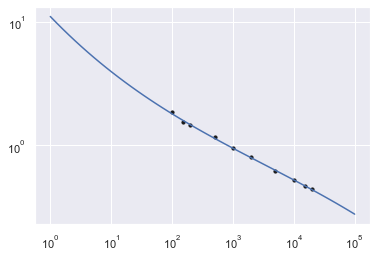

In [23]:
# gráfico
plt.scatter(abaco.index, abaco.Q10, s=10, c='k', label='abaco')
plt.plot(S_, Q_)

plt.xscale('log')
plt.yscale('log')

***

# Parte III: A partir de una distribucion normal

In [24]:
# https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6

In [25]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [26]:
# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
datos = np.random.multivariate_normal(mean, cov, 60)

In [27]:
datos


array([[ 5.15513469e-01, -1.90626217e+00, -3.73176906e-01],
       [-1.20385865e+00, -1.01278073e+00, -2.72118638e+00],
       [ 4.62393763e-01, -5.31880664e-01,  5.87114533e-01],
       [-5.25005816e-01, -8.68229909e-01, -7.92347125e-01],
       [ 2.58738004e-02, -7.59551827e-01, -1.81845255e-01],
       [ 1.24194767e-01,  8.30620258e-01,  7.41793627e-01],
       [-7.08583118e-01, -1.34998375e-01, -2.69553953e-01],
       [-6.24213088e-01, -7.16124084e-01, -9.91382955e-01],
       [ 2.50601360e-01,  1.46815759e-01,  7.78616694e-02],
       [-2.42249130e-01, -1.43377334e+00, -1.20877513e+00],
       [-1.01515510e+00,  8.02654457e-01, -6.36841325e-01],
       [ 1.48243691e+00,  1.27734358e+00,  2.56190045e+00],
       [ 1.26506979e+00, -2.68285773e+00,  1.44992081e+00],
       [ 3.43170246e-01,  6.02439599e-01,  1.41911552e+00],
       [-1.09952639e-01, -7.75078159e-01, -5.42585143e-01],
       [ 3.41870574e-01, -7.33297847e-01,  2.89115992e-01],
       [ 1.41896573e-01,  1.30220643e+00

In [28]:
datos.shape

(60, 3)

In [29]:
# regular grid covering the domain of the data
XX,YY = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
X = XX.flatten()
Y = YY.flatten()

In [30]:
order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane: Z = a·X + b·Y + c
    A = np.c_[datos[:,0], datos[:,1], np.ones(datos.shape[0])]
    pars, residues, rank, s = scipy.linalg.lstsq(A, datos[:,2])    # coefficients
    
    # evaluate it on grid
    a, b, c = pars
    ZZ = a * XX + b * YY + c
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve: Z = a + b·X + c·Y + d·X·Y + e·X² + f·Y²
    A = np.c_[np.ones(datos.shape[0]), datos[:,:2], np.prod(datos[:,:2], axis=1), datos[:,:2]**2]
    pars, residues, rank, s = scipy.linalg.lstsq(A, datos[:,2])
    
    # evaluate it on a grid
    a, b, c, d, e, f = pars
    ZZ = np.dot(np.c_[np.ones(X.shape), X, Y, X*Y, X**2, Y**2], pars).reshape(XX.shape)

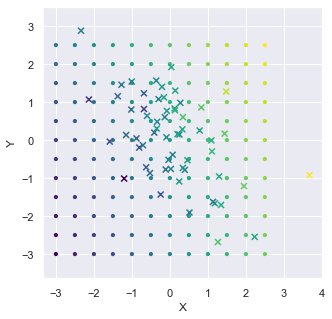

In [31]:
plt.figure(figsize=(5, 5))
plt.scatter(XX, YY, s=10, c=ZZ, cmap='viridis')
plt.scatter(datos[:,0], datos[:,1], marker='x', c=datos[:,2], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal');

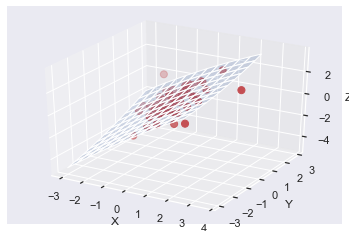

In [32]:
# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, alpha=0.2)
ax.scatter(datos[:,0], datos[:,1], datos[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
# ax.axis('equal')
ax.axis('tight')
plt.show()

In [33]:
pars

array([ 0.00831773,  1.04631298,  0.46887865, -0.04516529, -0.03258655,
        0.0372697 ])

 # parte IV: A partir de una malla regular con los datos del ábaco

In [34]:
abaco.shape

(10, 6)

In [35]:
abaco

,Q5,Q10,Q25,Q50,Q100,Q500
S,,,,,,
100,1.60,1.85,1.90,2.30,2.60,4.00
150,1.40,1.55,1.75,1.95,2.40,3.50
200,1.30,1.45,1.60,1.80,2.20,3.20
500,1.05,1.16,1.27,1.41,1.60,2.30
1000,0.90,0.95,1.05,1.15,1.30,1.95
2000,0.75,0.80,0.85,0.95,1.05,1.60
5000,0.58,0.62,0.68,0.73,0.80,1.20
10000,0.50,0.52,0.55,0.60,0.63,0.95
15000,0.45,0.47,0.50,0.53,0.56,0.85


In [36]:
data = pd.DataFrame(index=np.arange(abaco.shape[0] * abaco.shape[1]), columns=['S', 'Perido  retorno', 'Q'])
data.iloc[0,:] = [100, 5, 1.60]

In [37]:
data.head(2)

,S,Perido retorno,Q
0,100,5,1.6
1,NaN,NaN,NaN


In [38]:
data.shape

(60, 3)

In [39]:
data= []
for col in abaco.columns:
    for index in abaco.index:
        data.append([np.log10(index), np.log10(int(col[1:])), np.log10(abaco[col].loc[index])]) 
data  = np.array(data)  

In [40]:
# datanew.shape
# Una lista no tiene shape

In [41]:
data.shape

(60, 3)

In [42]:
data[:,1].min(), data[:,1].max()

(0.6989700043360189, 2.6989700043360187)

In [43]:
# regular grid covering the domain of the data
XX,YY = np.meshgrid(np.arange(np.log10(10), np.log10(50000), .5), np.array(np.log10([5, 10, 25, 50, 100, 500])))
X = XX.flatten()
Y = YY.flatten()

In [44]:
# order = 2    # 1: linear, 2: quadratic
# if order == 1:
#     # best-fit linear plane: Z = a·X + b·Y + c
#     A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
#     pars, residues, rank, s = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
#     # evaluate it on grid
#     a, b, c = pars
#     ZZ = a * XX + b * YY + c
    
#     # or expressed using matrix/vector product
#     #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

# elif order == 2:
#     # best-fit quadratic curve: Z = a + b·X + c·Y + d·X·Y + e·X² + f·Y²
#     A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
#     pars, residues, rank, s = scipy.linalg.lstsq(A, data[:,2])
    
#     # evaluate it on a grid
#     a, b, c, d, e, f = pars
#     ZZ = np.dot(np.c_[np.ones(X.shape), X, Y, X*Y, X**2, Y**2], pars).reshape(XX.shape)

In [45]:
order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane: Z = a·X + b·Y + c
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    pars, residues, rank, s = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    # evaluate it on grid
    a, b, c = pars
    ZZ = a * XX + b * YY + c
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)
elif order == 2:
#    # best-fit quadratic curve: Z = a + b·X + c·Y + d·X·Y + e·X² + f·Y²
#    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
#    pars, residues, rank, s = scipy.linalg.lstsq(A, data[:,2])
#    # evaluate it on a grid
#    a, b, c, d, e, f = pars
#    ZZ = np.dot(np.c_[np.ones(X.shape), X, Y, X*Y, X**2, Y**2], pars).reshape(XX.shape)

    # best-fit quadratic curve: Z = a + e·X² + f·Y²
    A = np.c_[np.ones(data.shape[0]), data[:,:2]**2]
    pars, residues, rank, s = scipy.linalg.lstsq(A, data[:,2])
    # evaluate it on a grid
    a, e, f = pars
    ZZ = np.dot(np.c_[np.ones(X.shape), X**2, Y**2], pars).reshape(XX.shape)

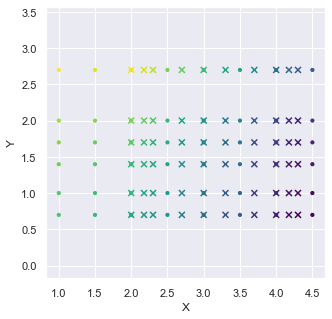

In [46]:
plt.figure(figsize=(5, 5))
plt.scatter(XX, YY, s=10, c=ZZ, cmap='viridis')
plt.scatter(data[:,0], data[:,1], marker='x', c=data[:,2], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal');

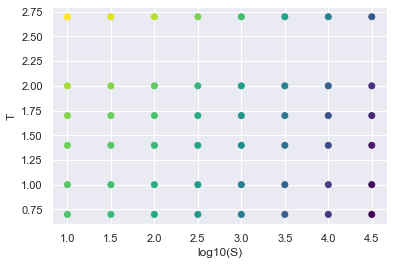

In [47]:
plt.scatter(XX.flatten(), YY.flatten(), c=ZZ.flatten(), cmap='viridis')
plt.xlabel('log10(S)')
plt.ylabel('T');

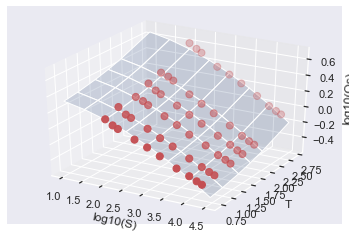

In [48]:
# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('log10(S)')
plt.ylabel('T')
ax.set_zlabel('log10(Qs)')
# ax.axis('equal')
ax.axis('tight')
plt.show()

In [50]:
pars

array([ 0.35185695, -0.04411999,  0.04832025])

In [52]:
Pars = pd.Series(pars, index=['a','e','f'])

Pars.to_csv('Parámetros_abaco.csv', header=None)

In [ ]:
print('La ecuación queda de la siguiente manera: 0 = {0:.3f} + {1:.3f}(log S) + {2:.4f} log T + {3:.4f} (log S) log T+ {4:.4f} (log S)²+{5:.6f} log T² -logQ '.format(*pars))

In [ ]:
   # best-fit quadratic curve: Z = a + e·X² + f·Y²

In [58]:
def QfromST(S, T, a, e, f):
    Slog = np.log10(S)
    Tlog = np.log10(T)
    Qlog = np.log10(Q)
    
    return 10**(a  + e * Slog**2 + f * Tlog**2)

In [ ]:
QfromST(200, 100, *pars)

In [ ]:
   # best-fit quadratic curve: Z = a + e·X² + f·Y²

In [55]:
S, Q = 5000, 0.8

def f(T, S=S, Q=Q, a=pars[0], e=pars[1], f=pars[2]):
    Slog = np.log10(S)
    Tlog = np.log10(T)
    Qlog = np.log10(Q)
    
    return a + e * Slog**2 + f * Tlog**2 - Qlog

# def fprime(T, S=S, c=0, d=0, f=0):
#     Slog = np.log10(S)
#     Tlog = np.log10(T)
    
#     return c + d * Slog + 2 * f * Tlog

In [56]:
# calcular retorno por el método de Brent
Tbrent = optimize.root_scalar(f, bracket=[10, 500], method='brentq').root

print('Brent:\tT = {0:.1f} años'.format(Tbrent))

Brent:	T = 61.7 años


In [ ]:
# calcular retorno por el método de Newton
Tnewton = optimize.root_scalar(f, x0=50, fprime=fprime, method='newton').root
Tnewton

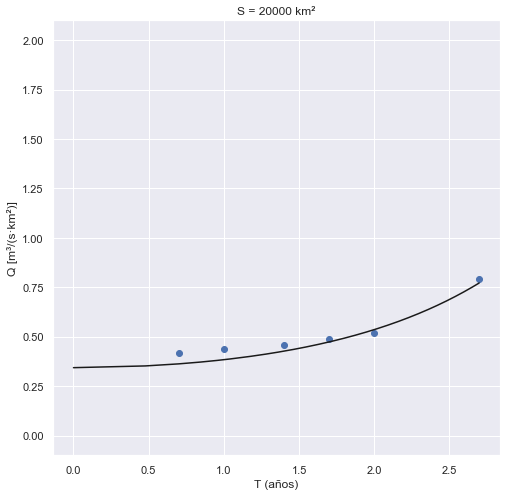

In [59]:
S = 20000

Ts = [5, 10, 25, 50, 100, 500]
Qabaco = abaco.loc[S,:]

Ts_ = np.arange(1, 500, 2)
Qs_ = np.array([QfromST(S, T, *pars) for T in Ts_])

plt.figure(figsize=(8, 8))
plt.scatter(np.log10(Ts), Qabaco);
plt.plot(np.log10(Ts_), Qs_, 'k')
plt.title('S = {0} km²'.format(S))
plt.xlabel('T (años)')
plt.ylabel('Q [m³/(s·km²)]')
plt.ylim(-.1, 2.1);

In [60]:
Qs_ = []
for T in Ts_:
    Qs_.append(QfromST(S, T, *pars))

Qs_

[0.34331080765366734,
 0.3521172688413117,
 0.36248895089889005,
 0.3717040993646037,
 0.3799153770892955,
 0.38733855529491,
 0.3941364657640389,
 0.40042722531944813,
 0.40629788207824796,
 0.4118141584559709,
 0.4170268598280115,
 0.4219760973784719,
 0.42669412827659425,
 0.4312073129918507,
 0.4355374967853634,
 0.43970300658754674,
 0.4437193849208117,
 0.4475999400848384,
 0.45135616536502793,
 0.4549980631585935,
 0.45853439892333747,
 0.4619729025445638,
 0.46532042975920984,
 0.46858309285519245,
 0.47176636746342726,
 0.4748751805497845,
 0.4779139834786439,
 0.48088681311534653,
 0.4837973432648892,
 0.486648928242342,
 0.4894446399905799,
 0.49218729987056503,
 0.4948795060254708,
 0.4975236570457429,
 0.5001219725256123,
 0.5026765109936888,
 0.5051891856144309,
 0.5076617779885599,
 0.5100959503250958,
 0.5124932562127987,
 0.5148551501821932,
 0.5171829962193641,
 0.5194780753680018,
 0.5217415925357285,
 0.5239746826037357,
 0.5261784159245649,
 0.52835380328096,
 0.53